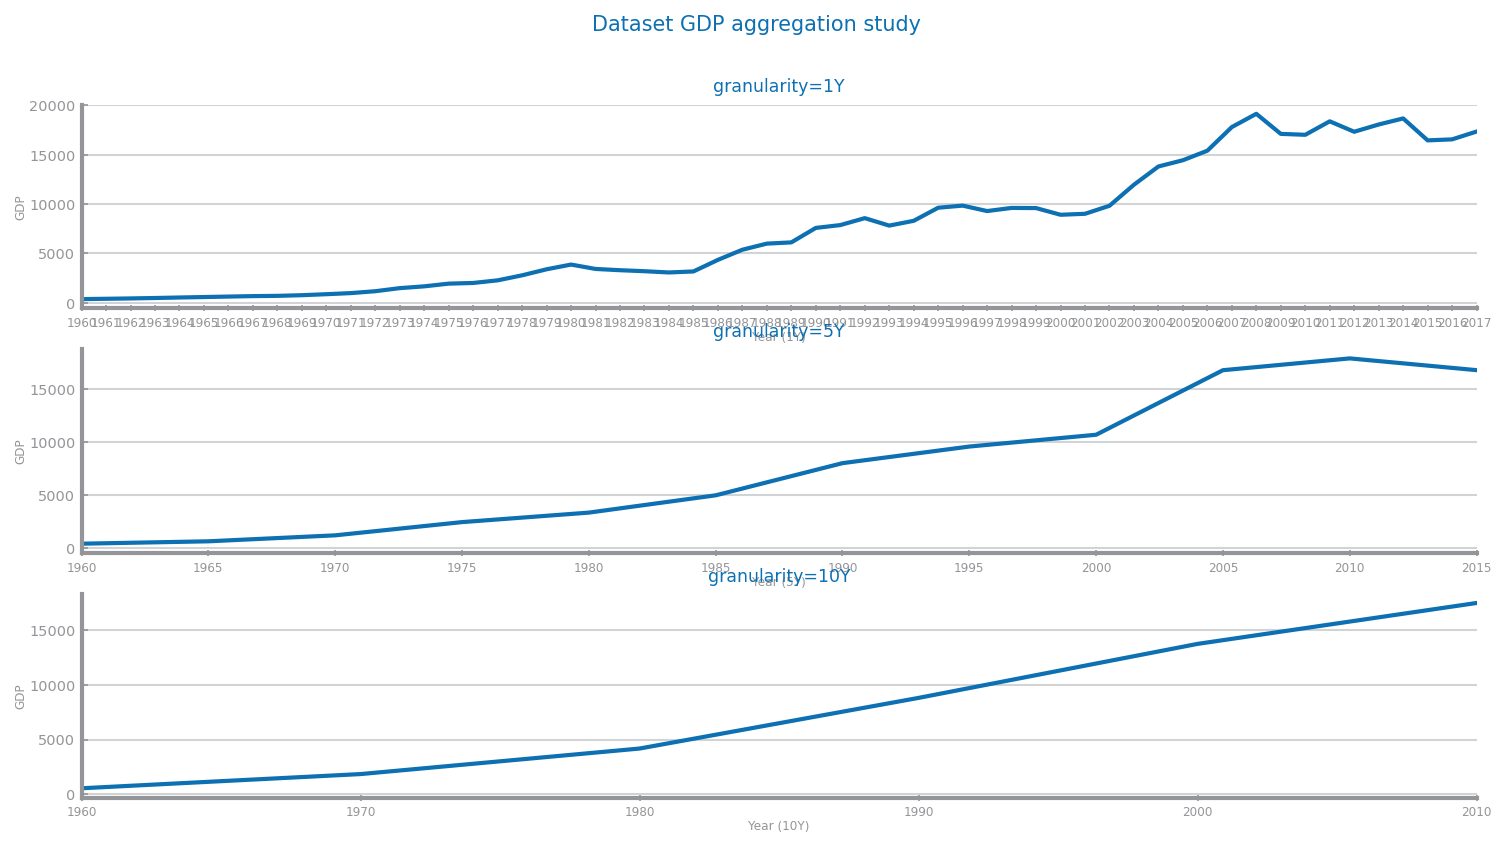

In [1]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show, subplots
from pandas import Index, Period
from dslabs_functions import plot_line_chart, HEIGHT

# Anpassung der Dateiparameter
file_tag = "Dataset"
target = "GDP"

data: DataFrame = read_csv(
    "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv",  # Pfad zum neuen Dataset
    index_col="Year",  # "Year" als Index nutzen
    sep=",",
    decimal=".",
    parse_dates=False,  # Jahre werden nicht als Datum geparst
    infer_datetime_format=False,
)

# Series für das Ziel ("GDP") extrahieren
series: Series = data[target]

# Funktion zur Aggregation der Zeitreihe nach Granularitätslevel
def ts_aggregation_by(
    data: Series | DataFrame,
    gran_level: str,
    agg_func: str = "mean",
) -> Series | DataFrame:
    df: Series | DataFrame = data.copy()
    if gran_level == "1Y":
        df.index = df.index.astype(int)
        grouped = df.groupby(df.index // 1).agg(agg_func)
    elif gran_level == "5Y":
        df.index = df.index.astype(int)
        grouped = df.groupby(df.index // 5).agg(agg_func)
    elif gran_level == "10Y":
        df.index = df.index.astype(int)
        grouped = df.groupby(df.index // 10).agg(agg_func)
    else:
        raise ValueError("Unsupported granularity level")

    grouped.index = grouped.index * int(gran_level[:-1])  # Startjahr der Gruppen setzen
    return grouped

# Granularitäten definieren
grans: list[str] = ["1Y", "5Y", "10Y"]

# Plotting
fig, axs = subplots(len(grans), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(grans)))
fig.suptitle(f"{file_tag} {target} aggregation study")

for i, gran in enumerate(grans):
    aggregated: Series = ts_aggregation_by(series, gran)
    plot_line_chart(
        aggregated.index.to_list(),
        aggregated.to_list(),
        ax=axs[i],
        xlabel=f"Year ({gran})",
        ylabel=target,
        title=f"granularity={gran}",
    )

show()
